In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load & prep
df = pd.read_csv('../OLX_cars_dataset00.csv')

# Remove useless columns (based on distribution and obviously useless columns)
df = df.drop(['Car Name', 'Condition', 'Seller Location', 'Description', 'Car Features', "Images URL's", 'Car Profile', 'Ad ID', 'Car documents', 'Fuel'], axis=1)
df.head()

,Make,Model,Year,KM's driven,Price,Registration city,Assembly,Transmission
0,Toyota,Passo,2021,54000,4190000,Unregistered,Imported,Automatic
1,Suzuki,Ravi,2018,95000,1300000,Karachi,Local,Manual
2,Suzuki,Bolan,2015,50000,800000,Karachi,Local,Manual
3,Daihatsu,Move,2013,94000,2155000,Lahore,Imported,Automatic
4,Suzuki,Swift,2011,126544,1440000,Karachi,Local,Manual


In [3]:
# Filter out top cities
top_cities = df['Registration city'].value_counts().head(5).index
df = df[df['Registration city'].isin(top_cities)]

In [4]:
# Set up variables
y = df['Price']
X = df.drop(['Price'], axis=1)

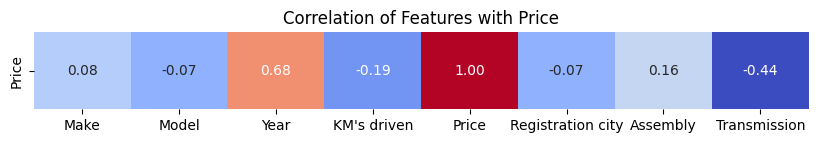

In [6]:
# Encode categorical variables
df_encoded = df.copy()
for col in ['Make', 'Model', 'Registration city', 'Assembly', 'Transmission']:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Correlation matrix
corr_matrix = df_encoded.corr()

# Keep only the Price row
price_corr = corr_matrix.loc[['Price']]

# Plot only that row
plt.figure(figsize=(10, 1))  # 1 row height
sns.heatmap(price_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Correlation of Features with Price")
plt.show()


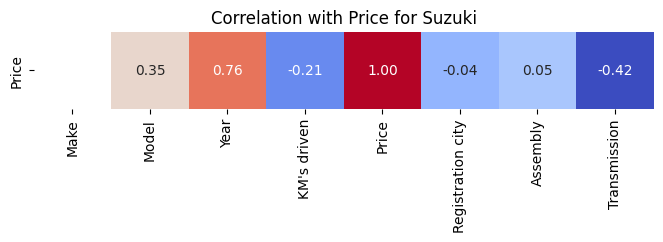

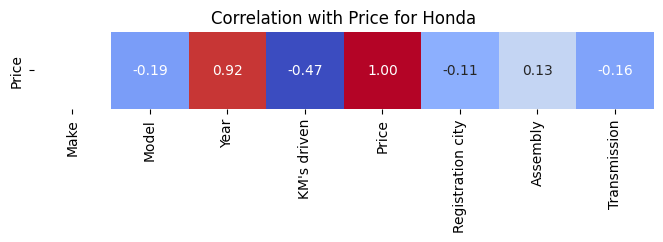

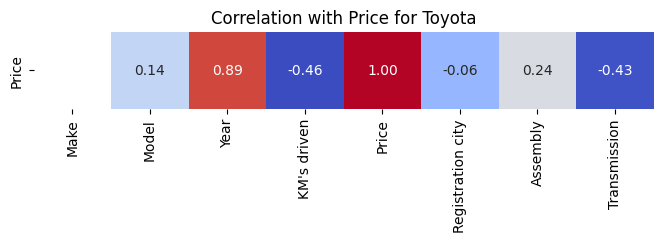

In [7]:
# For top 3 models
top3_makes = df['Make'].value_counts().head(3).index

# Loop over the top 3 makes
for make in top3_makes:
    df_make = df[df['Make'] == make].copy()

    # Encode categorical columns so correlation works
    for col in ['Make', 'Model', 'Registration city', 'Assembly', 'Transmission']:
        df_make[col] = LabelEncoder().fit_transform(df_make[col])

    # Correlation matrix
    corr_matrix = df_make.corr()

    # Keep only the 'Price' row
    price_corr = corr_matrix.loc[['Price']]  # Keep as DataFrame

    # Plot heatmap for just 'Price'
    plt.figure(figsize=(8, 1))
    sns.heatmap(price_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
    plt.title(f"Correlation with Price for {make}")
    plt.show()